In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_style("whitegrid")

# We need to go up one directory ('../') to find the 'data' folder
DATA_PATH = "../data/processed/matches.csv"

# Load the dataset
try:
    df = pd.read_csv(DATA_PATH, parse_dates=['match_date'])
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: Could not find data file at {DATA_PATH}")

df.head()

Data loaded successfully!


,match_id,match_date,home_team,away_team,home_score,away_score,home_xg,away_xg,home_passes,away_passes,home_possession,away_possession
0,2275027,2025-11-03,Brighton & Hove Albion WFC,Everton LFC,1,0,0.895871,0.461895,353,485,0.456186,0.543814
1,2275099,2025-11-03,Liverpool WFC,Reading WFC,0,1,0.819212,1.166593,404,426,0.487108,0.512892
2,2275104,2025-11-03,Arsenal WFC,Bristol City WFC,11,1,5.763381,2.087736,788,270,0.685173,0.314827
3,2275105,2025-11-03,Manchester City WFC,Chelsea FCW,3,3,2.390647,2.336752,456,557,0.465342,0.534658
4,2275110,2025-11-03,Birmingham City WFC,Liverpool WFC,2,0,0.899049,0.501909,548,337,0.607403,0.392597


In [2]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   match_id         43 non-null     int64         
 1   match_date       43 non-null     datetime64[ns]
 2   home_team        43 non-null     object        
 3   away_team        43 non-null     object        
 4   home_score       43 non-null     int64         
 5   away_score       43 non-null     int64         
 6   home_xg          43 non-null     float64       
 7   away_xg          43 non-null     float64       
 8   home_passes      43 non-null     int64         
 9   away_passes      43 non-null     int64         
 10  home_possession  43 non-null     float64       
 11  away_possession  43 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 4.2+ KB


In [3]:
# Get descriptive statistics for all numerical columns
df.describe()

,match_id,match_date,home_score,away_score,home_xg,away_xg,home_passes,away_passes,home_possession,away_possession
count,4.300000e+01,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2.275097e+06,2025-11-03 00:00:00,2.046512,1.325581,1.731711,1.312667,464.000000,444.906977,0.508803,0.491197
min,2.275027e+06,2025-11-03 00:00:00,0.000000,0.000000,0.158668,0.130376,275.000000,237.000000,0.366030,0.308846
25%,2.275074e+06,2025-11-03 00:00:00,1.000000,0.000000,0.711920,0.463504,359.500000,356.000000,0.446205,0.434876
50%,2.275097e+06,2025-11-03 00:00:00,1.000000,1.000000,1.426490,1.082195,430.000000,424.000000,0.491901,0.508099
75%,2.275132e+06,2025-11-03 00:00:00,3.000000,2.000000,2.401237,2.037449,552.500000,530.500000,0.565124,0.553795
max,2.275156e+06,2025-11-03 00:00:00,11.000000,6.000000,5.763381,4.187613,788.000000,740.000000,0.691154,0.633970
std,3.786161e+01,NaN,2.170730,1.392513,1.404152,0.982659,130.849787,127.203402,0.087509,0.087509


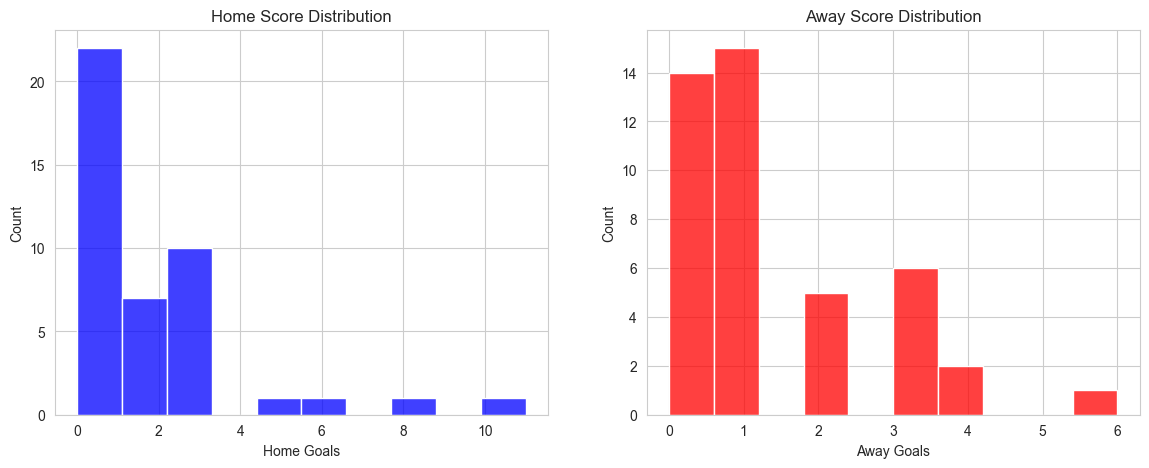

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['home_score'], bins=10, ax=ax[0], kde=False, color='blue')
ax[0].set_title('Home Score Distribution')
ax[0].set_xlabel('Home Goals')

sns.histplot(df['away_score'], bins=10, ax=ax[1], kde=False, color='red')
ax[1].set_title('Away Score Distribution')
ax[1].set_xlabel('Away Goals')

plt.show()

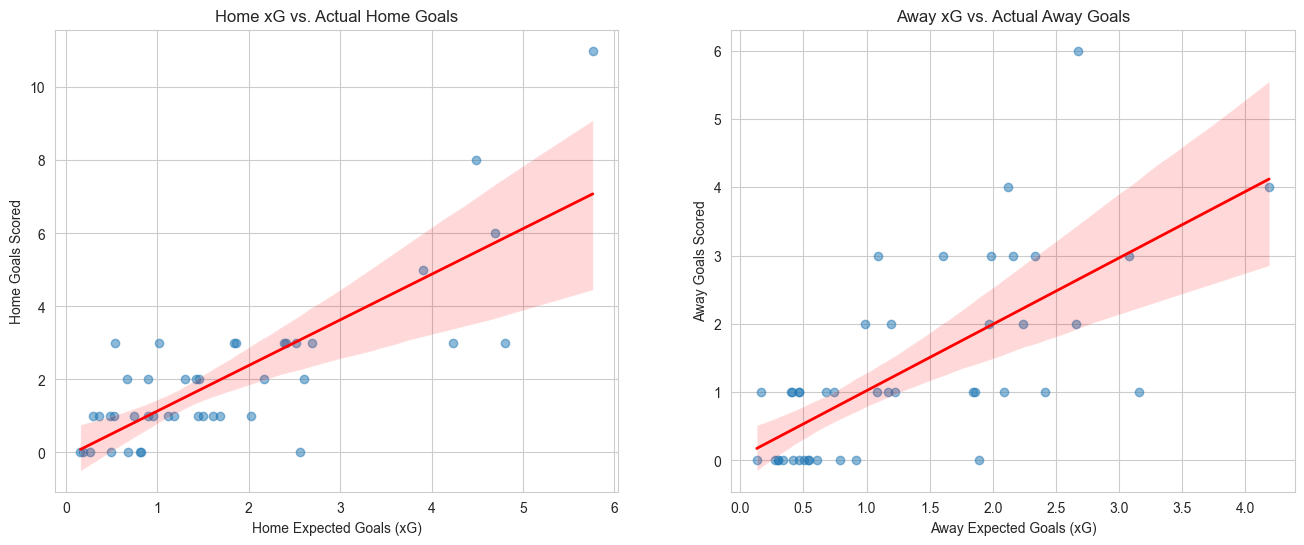

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Home xG vs. Home Score
sns.regplot(data=df, x='home_xg', y='home_score', ax=ax[0], 
            line_kws={"color": "red", "lw": 2}, 
            scatter_kws={"alpha": 0.5})
ax[0].set_title('Home xG vs. Actual Home Goals')
ax[0].set_xlabel('Home Expected Goals (xG)')
ax[0].set_ylabel('Home Goals Scored')

# Plot Away xG vs. Away Score
sns.regplot(data=df, x='away_xg', y='away_score', ax=ax[1], 
            line_kws={"color": "red", "lw": 2}, 
            scatter_kws={"alpha": 0.5})
ax[1].set_title('Away xG vs. Actual Away Goals')
ax[1].set_xlabel('Away Expected Goals (xG)')
ax[1].set_ylabel('Away Goals Scored')

plt.show()

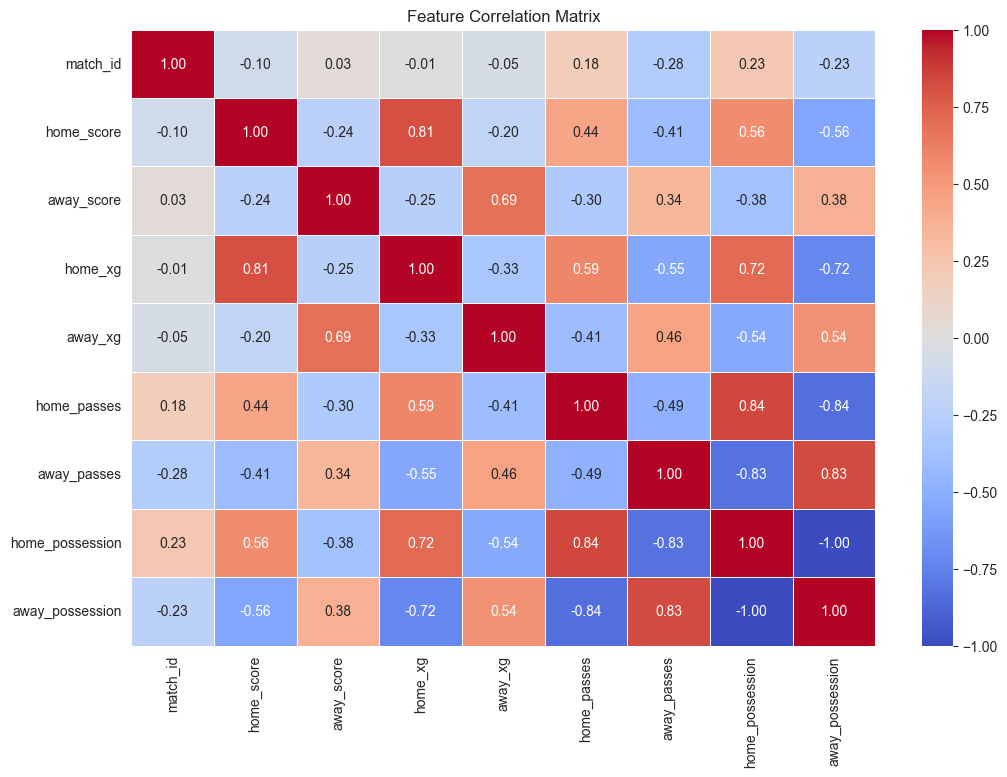

In [6]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()